In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from scipy import stats
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# pre-process using PANDAS
area1_1 = pd.read_csv("chk_trks_area1-1_20220203.txt", sep='\s+', header=None)
area1_2 = pd.read_csv("chk_trks_area1-2_20220203.txt", sep='\s+', header=None)
area1_3 = pd.read_csv("chk_trks_area1-3_20220203.txt", sep='\s+', header=None)
area1_4 = pd.read_csv("chk_trks_area1-4_20220203.txt", sep='\s+', header=None)

combine = area1_1.append(area1_2, ignore_index=True)
combine = combine.append(area1_3, ignore_index=True)

emulsion = combine.append(area1_4, ignore_index=True)
emulsion.columns = ["t->ID", "plate_first", "plate_last", "x_last", "y_last", "z_last", 
                    "tx_last", "ty_last", "tx_pos", "ty_pos", "t->N()", "t->Npl()"]


In [3]:
# we want to match these emulstion tracks with tracks in the IFT
# IFT sits adjacent to the emulsion. For now we'll look at tracks
# that end on the last plate (plate closest to the IFT)
emulsion_20 = emulsion[emulsion["plate_last"] == 20]

C:\Users\vanth\anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Users\vanth\anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


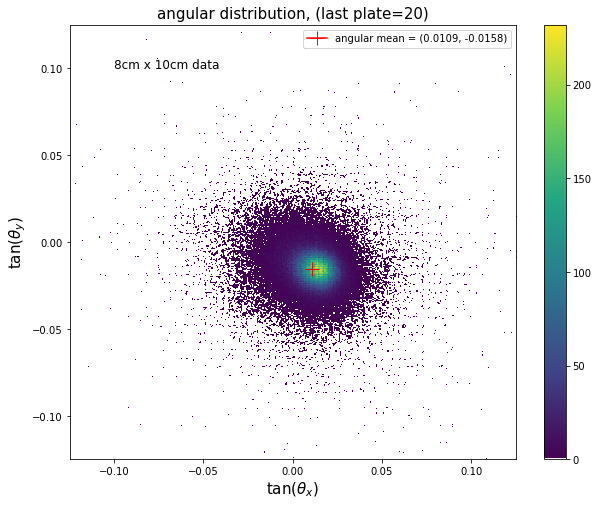

In [4]:
x = emulsion_20["tx_last"]
y = emulsion_20["ty_last"]
x_mean = np.round(np.mean(x),4)
y_mean = np.round(np.mean(y),4)
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density)

fig = plt.figure(figsize=(10,8))
using_mpl_scatter_density(fig, x, y)
plt.xlim(-0.125,0.125)
plt.ylim(-0.125,0.125)
plt.xlabel("tan($\u03B8_{x}$)",size=15)
plt.ylabel("tan($\u03B8_{y}$)",size=15)
plt.title("angular distribution, (last plate=20)",size=15)
plt.text(-0.1, 0.1, '8cm x 10cm data', fontsize = 12)
plt.plot(x_mean,y_mean, marker='+',markersize=14,color='r',label='angular mean = (' + str(x_mean) + ', ' + str(y_mean)+')')
plt.legend()
file_name = 'plots/angular_dist_last.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [6]:
emulsion_20["t->ID"].unique

<bound method Series.unique of 4           1133
5           1229
6           1256
7           1284
8           1373
           ...  
201377    104635
201378    104637
201379    104639
201380    104725
201381    104749
Name: t->ID, Length: 166390, dtype: int64>

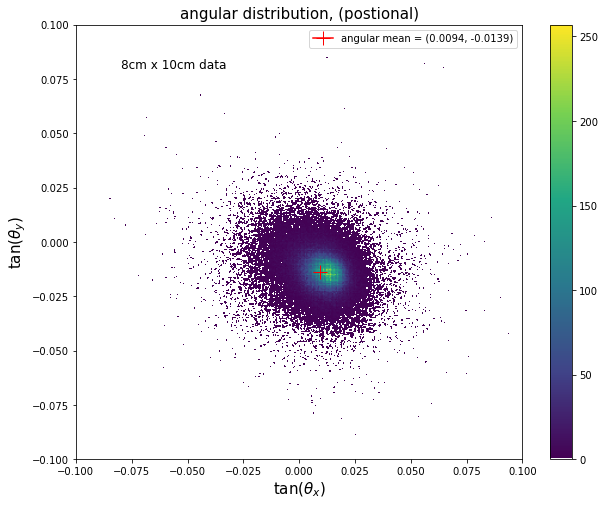

In [5]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

x1 = emulsion_20["tx_pos"]
y1 = emulsion_20["ty_pos"]
x1_mean = np.round(np.mean(x1),4)
y1_mean = np.round(np.mean(y1),4)
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x1, y1):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x1, y1, cmap=white_viridis)
    fig.colorbar(density)

fig = plt.figure(figsize=(10,8))
using_mpl_scatter_density(fig, x1, y1)
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
plt.xlabel("tan($\u03B8_{x}$)",size=15)
plt.ylabel("tan($\u03B8_{y}$)",size=15)
plt.title("angular distribution, (postional)",size=15)
plt.text(-0.08, 0.08, '8cm x 10cm data', fontsize = 12)
plt.plot(x1_mean,y1_mean, marker='+',markersize=14,color='r',label='angular mean = (' + str(x1_mean) + ', ' + str(y1_mean)+')')
plt.legend()
file_name = 'plots/angular_dist_postional.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

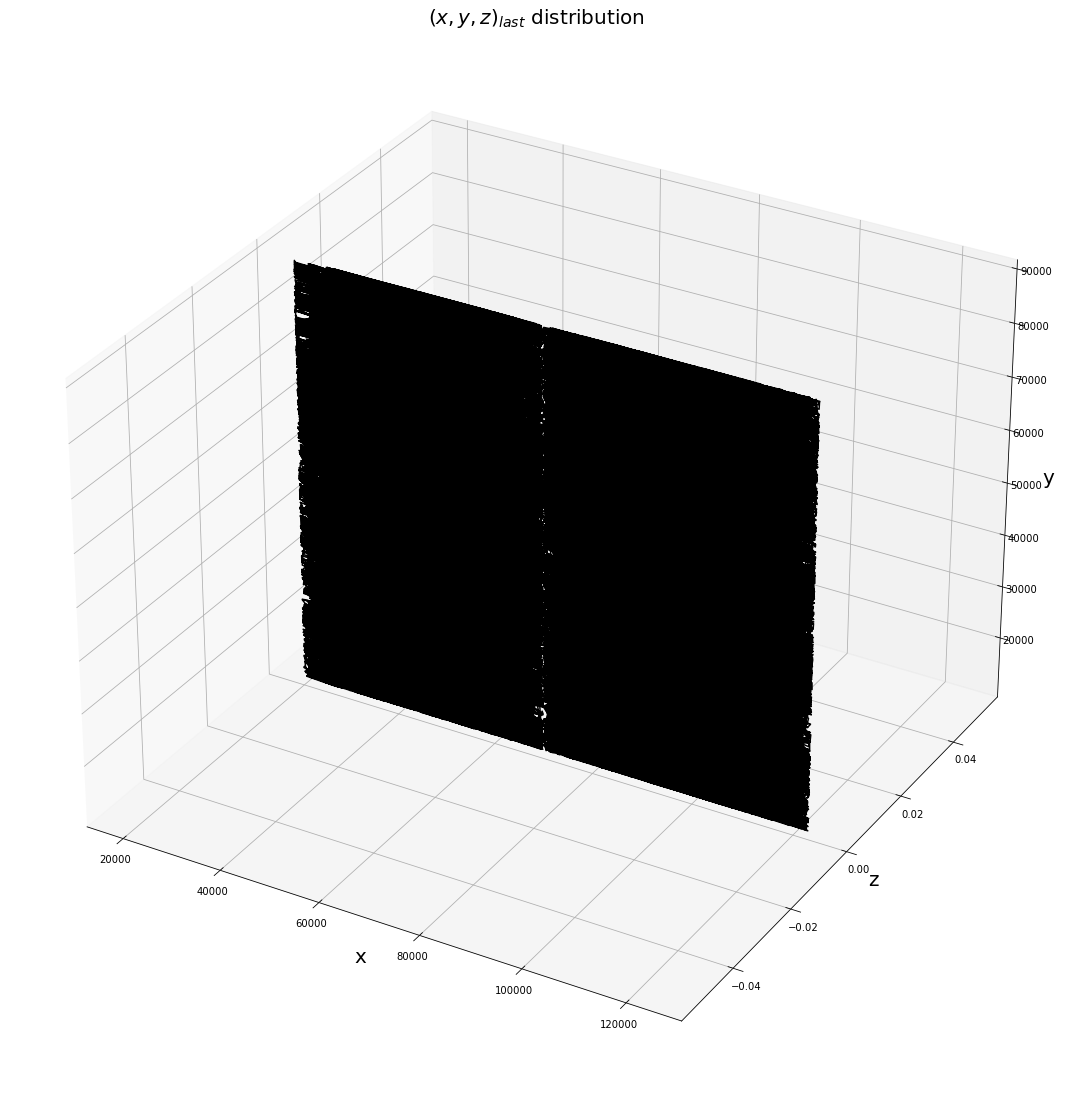

In [9]:
plt.rcParams["figure.figsize"] = [15, 20]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x, y, z = emulsion_20['x_last'], emulsion_20['y_last'], emulsion_20['z_last']
#ax.scatter(z, y, x, c='red', s=100)
ax.plot(x, z, y,color='black')
ax.set_xlabel("x", size=20)
ax.set_ylabel("z", size=20)
ax.set_zlabel("y", size=20)
ax.set_title("$(x,y,z)_{last}$ distribution", size=20)
file_name = 'plots/xyz_dist.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')
#plt.show()

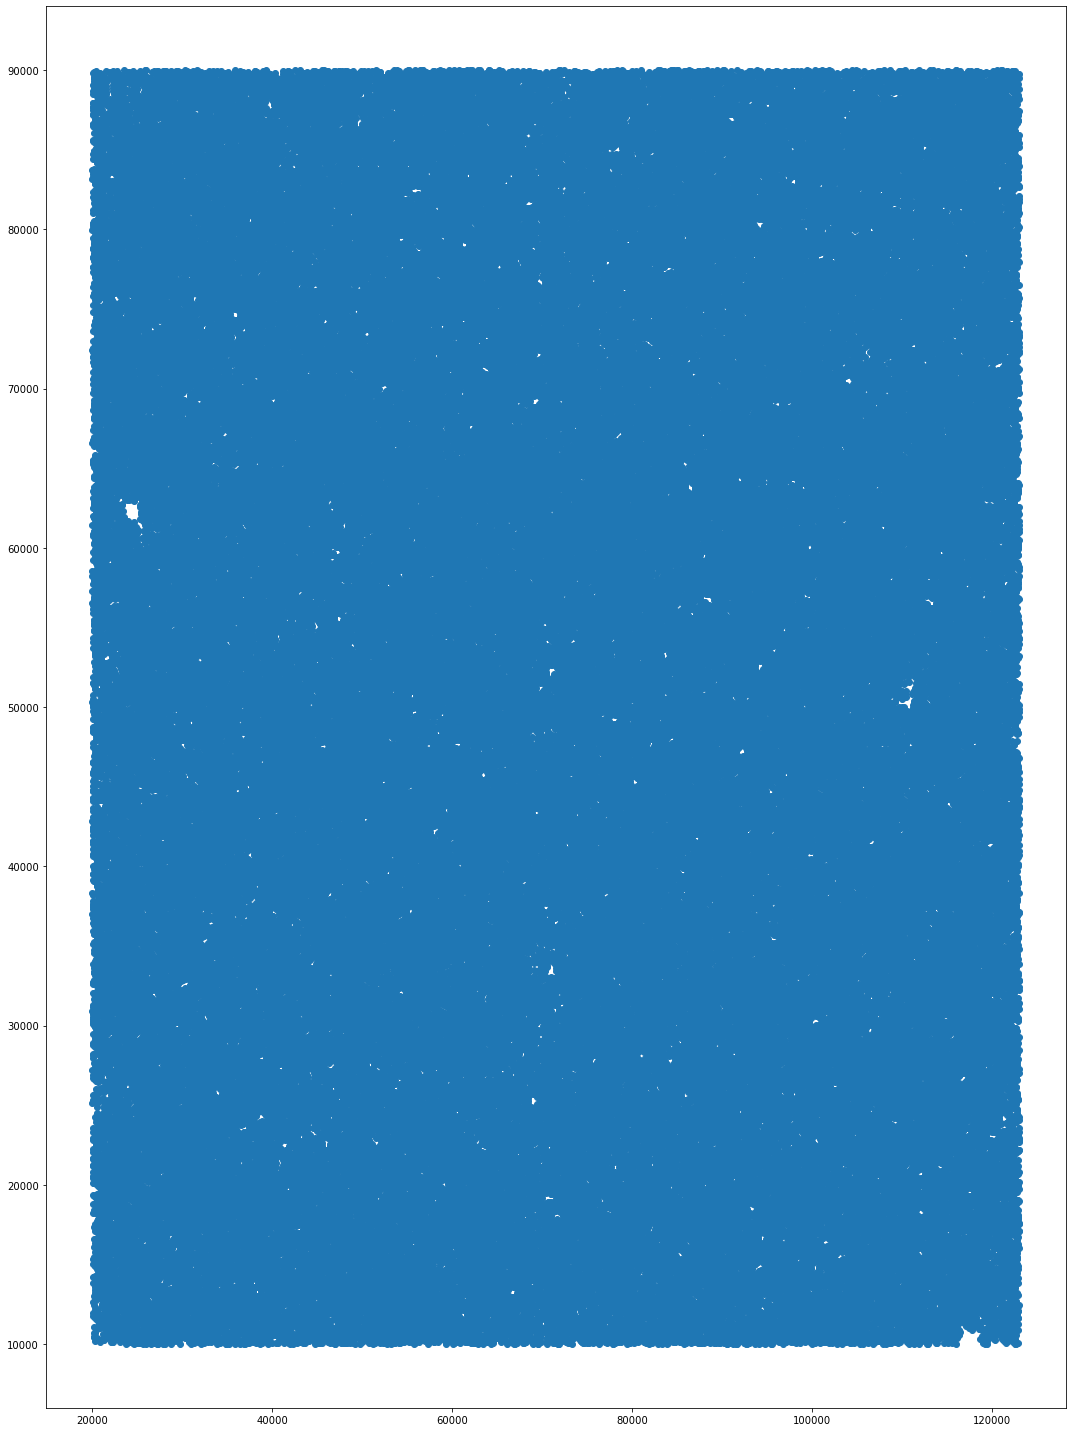

In [7]:
plt.scatter(emulsion["x_last"], emulsion["y_last"])

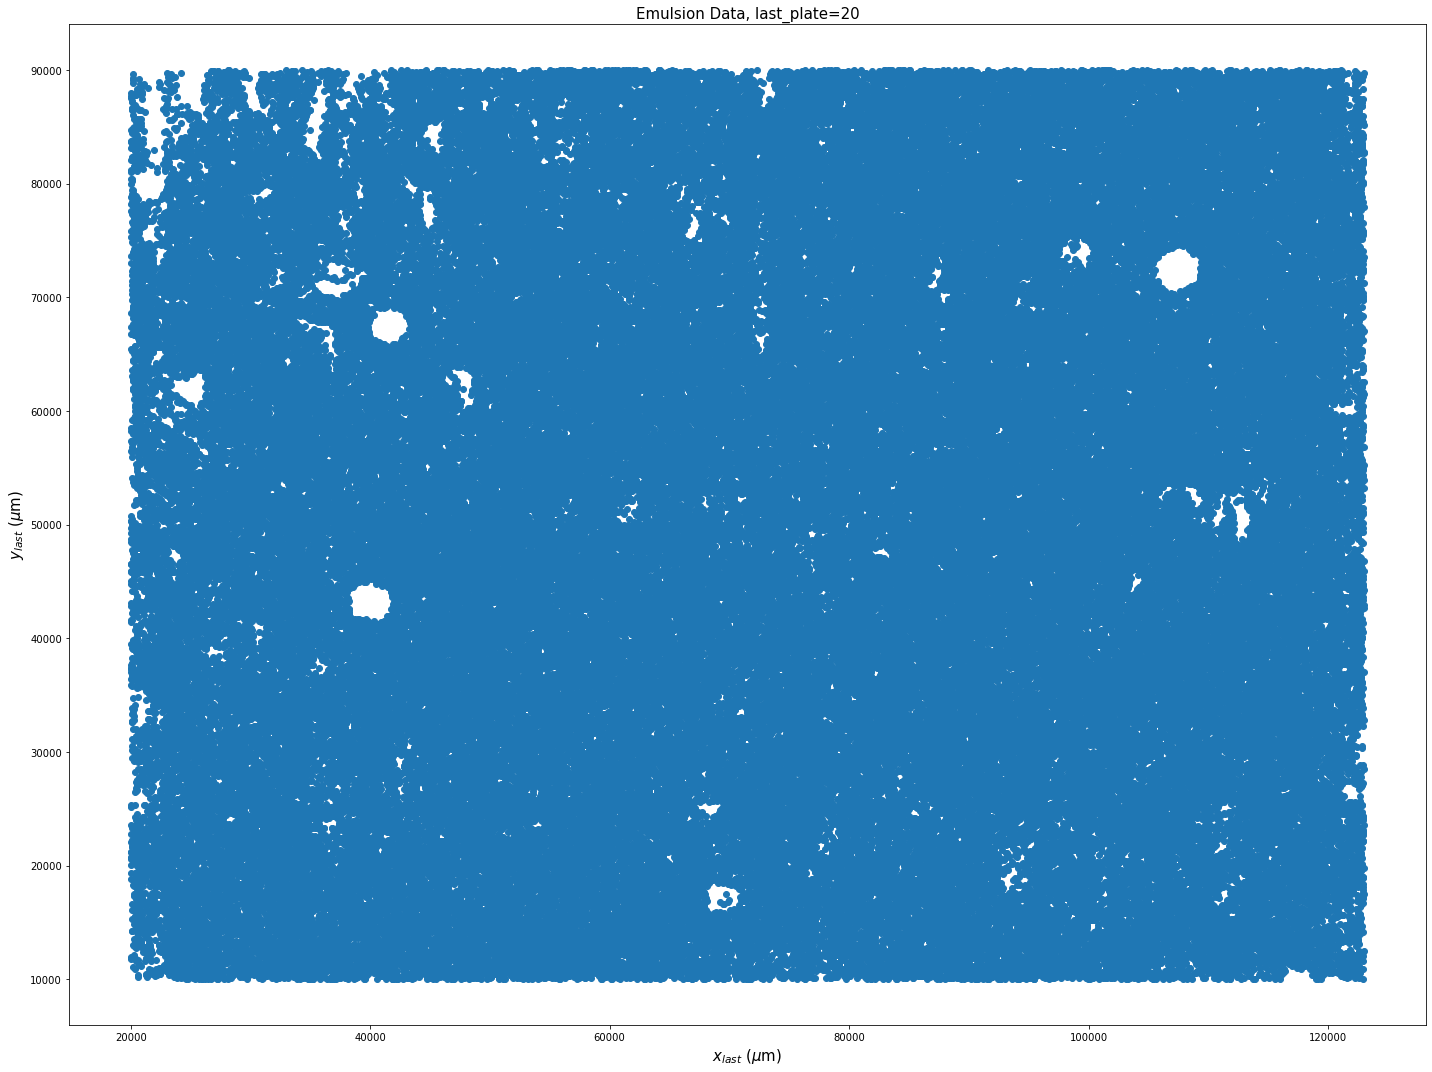

In [8]:
fig = plt.figure(figsize=(20,15))
plt.scatter(emulsion_20["x_last"], emulsion_20["y_last"])
plt.title("Emulsion Data, last_plate=20",size=15)
plt.ylabel("$y_{last}$ ($\mu$m)",size=15)
plt.xlabel("$x_{last}$ ($\mu$m)",size=15)
file_name = 'plots/x_y-dist.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(emulsion_20["t->N()"], emulsion_20["t->Npl()"])
plt.title("plate num vs number of plates",size=15)
plt.xlabel("t->N()",size=15)
plt.ylabel("t->Npl()",size=15)
#plt.show()
file_name = 'plots/plate_numVS_numplate.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

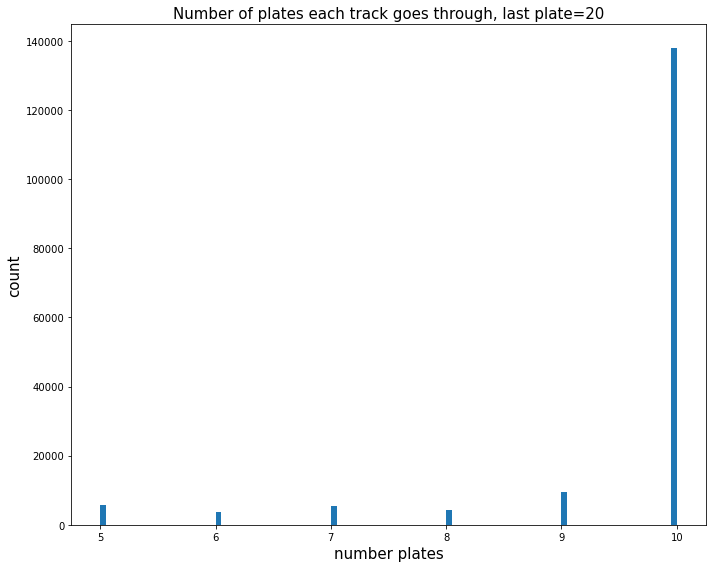

In [29]:
fig = plt.figure(figsize=(10,8))
plt.hist(emulsion_20["t->Npl()"],bins=100)
plt.title("Number of plates each track goes through, last plate=20", size=15)
plt.xlabel("number plates",size=15)
plt.ylabel("count",size=15)
file_name = 'plots/num_plates.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

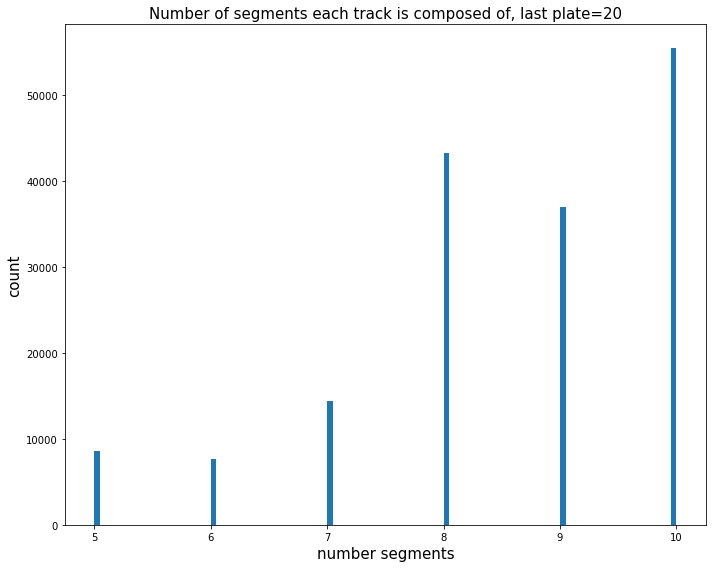

In [30]:
fig = plt.figure(figsize=(10,8))
plt.hist(emulsion_20["t->N()"],bins=100)
plt.title("Number of segments each track is composed of, last plate=20", size=15)
plt.xlabel("number segments",size=15)
plt.ylabel("count",size=15)
file_name = 'plots/num_segments.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')